In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv("Bitcoin Energy Consumption.csv", header=0)
df2 = pd.read_csv("Carbon Footprint Generated by Bitcoin.csv", header=0)
df3 = pd.read_csv("Bitcoin Hash Rate.csv", header=0)
df4 = pd.read_csv("Bitcoin Trade Volume & Price.csv", header=0)

# Date Formatting

## DF1

In [3]:
df1.head()

,Timestamp,Date and Time,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh"
0,1279411200,2010-07-18T00:00:00,0.000027,0.000022,0.000024,0.000234,0.000197,0.000214
1,1279497600,2010-07-19T00:00:00,0.000027,0.000023,0.000025,0.000235,0.000198,0.000215
2,1279584000,2010-07-20T00:00:00,0.000027,0.000023,0.000025,0.000239,0.000201,0.000219
3,1279670400,2010-07-21T00:00:00,0.000028,0.000024,0.000026,0.000249,0.000210,0.000229
4,1279756800,2010-07-22T00:00:00,0.000028,0.000024,0.000026,0.000247,0.000208,0.000227


In [4]:
df1.drop('Timestamp', axis=1, inplace=True)
df1["Date and Time"] = pd.to_datetime(df1["Date and Time"])
df1.rename(columns = {'Date and Time':'Date'}, inplace = True)
threshhold = len(df1.index)*0.7
df1.dropna(axis=1, thresh=threshhold, inplace=True)
df1.dropna(inplace=True)
df1.head()

,Date,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh"
0,2010-07-18,0.000027,0.000022,0.000024,0.000234,0.000197,0.000214
1,2010-07-19,0.000027,0.000023,0.000025,0.000235,0.000198,0.000215
2,2010-07-20,0.000027,0.000023,0.000025,0.000239,0.000201,0.000219
3,2010-07-21,0.000028,0.000024,0.000026,0.000249,0.000210,0.000229
4,2010-07-22,0.000028,0.000024,0.000026,0.000247,0.000208,0.000227


## DF2

In [5]:
df2.head()

,Date,BTCENEMAX,BTCENEMIN,BTCENEGUE,BTCEMI_MAX,BTCEMI_MIN,BTCEMI_GUE,BTCOAL_MAX,BTCOAL_MIN,BTCOAL_GUE,BTCOIL_MAX,BTCOIL_MIN,BTCOIL_GUE,BTCGAS_MAX,BTCGAS_MIN,BTCGAS_GUE
0,7/18/2010,1632822.0,137429.2,823214.3,904583.3,76135.76,456060.7,1663845.0,140040.3,838855.4,1394430.0,117364.5,703025.0,839270.4,70638.59,423132.2
1,7/19/2010,1642310.0,138227.8,827998.0,909839.8,76578.18,458710.9,1673514.0,140854.1,843729.9,1402533.0,118046.5,707110.3,844147.4,71049.07,425591.0
2,7/20/2010,1667626.0,140358.5,840761.6,923864.9,77758.63,465781.9,1699311.0,143025.4,856736.1,1424153.0,119866.2,718010.4,857159.9,72144.30,432151.5
3,7/21/2010,1741990.0,146617.5,878253.3,965062.4,81226.09,486552.3,1775088.0,149403.2,894940.1,1487660.0,125211.3,750028.3,895382.9,75361.40,451422.2
4,7/22/2010,1727749.0,145418.9,871073.5,957173.0,80562.06,482574.7,1760576.0,148181.8,887623.9,1475498.0,124187.7,743896.8,888063.1,74745.31,447731.8


In [6]:
df2["Date"] = pd.to_datetime(df2["Date"])
df2 = df2[["Date", "BTCEMI_GUE"]]
threshhold = len(df2.index)*0.7
df2.dropna(axis=1, thresh=threshhold, inplace=True)
df2.dropna(inplace=True)
df2.head()

,Date,BTCEMI_GUE
0,2010-07-18,456060.7
1,2010-07-19,458710.9
2,2010-07-20,465781.9
3,2010-07-21,486552.3
4,2010-07-22,482574.7


## DF3

In [7]:
df3.head()

,Date,Value
0,2022-05-30,2.288761e+08
1,2022-05-29,2.214450e+08
2,2022-05-28,2.199588e+08
3,2022-05-27,2.050967e+08
4,2022-05-26,2.095554e+08


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4896 non-null   object 
 1   Value   4896 non-null   float64
dtypes: float64(1), object(1)
memory usage: 76.6+ KB


In [9]:
df3["Date"] = pd.to_datetime(df3["Date"])
threshhold = len(df3.index)*0.7
df3.dropna(axis=1, thresh=threshhold, inplace=True)
df3.dropna(inplace=True)
df3.head()

,Date,Value
0,2022-05-30,2.288761e+08
1,2022-05-29,2.214450e+08
2,2022-05-28,2.199588e+08
3,2022-05-27,2.050967e+08
4,2022-05-26,2.095554e+08


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4896 non-null   datetime64[ns]
 1   Value   4896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 114.8 KB


## DF4

In [11]:
df4.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'], unit="s")
df4.rename(columns = {'Timestamp':'Date'}, inplace = True)
threshhold = len(df4.index)*0.7
df4.dropna(axis=1, thresh=threshhold, inplace=True)
df4.dropna(inplace=True)
df4.head()

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


# Join DF

In [13]:
df12 = df1.join(df2.set_index('Date'), on="Date", sort="True", lsuffix="df1", rsuffix="df2")
threshhold = len(df12.index)*0.7
df12.dropna(axis=1, thresh=threshhold, inplace=True)
df12.dropna(inplace=True)
df12

,Date,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh",BTCEMI_GUE
0,2010-07-18,0.000027,0.000022,0.000024,0.000234,0.000197,0.000214,4.560607e+05
1,2010-07-19,0.000027,0.000023,0.000025,0.000235,0.000198,0.000215,4.587109e+05
2,2010-07-20,0.000027,0.000023,0.000025,0.000239,0.000201,0.000219,4.657819e+05
3,2010-07-21,0.000028,0.000024,0.000026,0.000249,0.000210,0.000229,4.865523e+05
4,2010-07-22,0.000028,0.000024,0.000026,0.000247,0.000208,0.000227,4.825747e+05
...,...,...,...,...,...,...,...,...
4153,2021-11-30,48.246259,4.665684,12.615596,422.926709,40.899388,110.588313,6.250000e+10
4154,2021-12-01,47.152592,4.559920,12.329620,413.339624,39.972263,108.081450,6.110000e+10
4155,2021-12-02,48.278038,4.668757,12.623905,423.205278,40.926327,110.661154,6.250000e+10
4156,2021-12-03,49.939577,4.829437,13.058370,437.770331,42.334849,114.469674,6.470000e+10


In [14]:
df123 = df12.join(df3.set_index('Date'), on="Date", sort="True", lsuffix="df12", rsuffix="df3")
threshhold = len(df123.index)*0.7
df123.dropna(axis=1, thresh=threshhold, inplace=True)
df123.dropna(inplace=True)
df123

,Date,"power MAX, GW","power MIN, GW","power GUESS, GW","annualised consumption MAX, TWh","annualised consumption MIN, TWh","annualised consumption GUESS, TWh",BTCEMI_GUE,Value
0,2010-07-18,0.000027,0.000022,0.000024,0.000234,0.000197,0.000214,4.560607e+05,1.615397e-03
1,2010-07-19,0.000027,0.000023,0.000025,0.000235,0.000198,0.000215,4.587109e+05,1.606373e-03
2,2010-07-20,0.000027,0.000023,0.000025,0.000239,0.000201,0.000219,4.657819e+05,1.822962e-03
3,2010-07-21,0.000028,0.000024,0.000026,0.000249,0.000210,0.000229,4.865523e+05,1.822962e-03
4,2010-07-22,0.000028,0.000024,0.000026,0.000247,0.000208,0.000227,4.825747e+05,1.750766e-03
...,...,...,...,...,...,...,...,...,...
4153,2021-11-30,48.246259,4.665684,12.615596,422.926709,40.899388,110.588313,6.250000e+10,1.487818e+08
4154,2021-12-01,47.152592,4.559920,12.329620,413.339624,39.972263,108.081450,6.110000e+10,1.521127e+08
4155,2021-12-02,48.278038,4.668757,12.623905,423.205278,40.926327,110.661154,6.250000e+10,1.720983e+08
4156,2021-12-03,49.939577,4.829437,13.058370,437.770331,42.334849,114.469674,6.470000e+10,1.865324e+08


# Regression

In [15]:
# df123["Date"] = df123["Date"].astype(float)
df123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4158 entries, 0 to 4157
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               4158 non-null   datetime64[ns]
 1   power MAX, GW                      4158 non-null   float64       
 2   power MIN, GW                      4158 non-null   float64       
 3   power GUESS, GW                    4158 non-null   float64       
 4   annualised consumption MAX, TWh    4158 non-null   float64       
 5   annualised consumption MIN, TWh    4158 non-null   float64       
 6   annualised consumption GUESS, TWh  4158 non-null   float64       
 7   BTCEMI_GUE                         4158 non-null   float64       
 8   Value                              4158 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 324.8 KB


In [16]:
feature_cols = df123[df123.columns.difference(["BTCEMI_GUE", "Date"])].columns.values
X = df123[feature_cols]
y = df123['BTCEMI_GUE']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

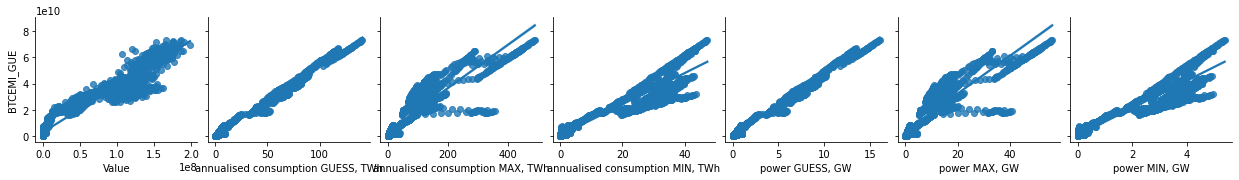

In [17]:
sns.pairplot(df123, x_vars=feature_cols, y_vars='BTCEMI_GUE', kind='reg')

In [18]:
np.sqrt(metrics.mean_squared_error(y, y_pred))

1448539202.8260682

In [19]:
feature_cols = df123[df123.columns.difference(["BTCEMI_GUE", "Date"])].columns.values
X = df123[feature_cols]
y = df123['BTCEMI_GUE']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1422844469.5011187